In [1]:
import pandas as pd


In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('Index2018.csv')

In [4]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


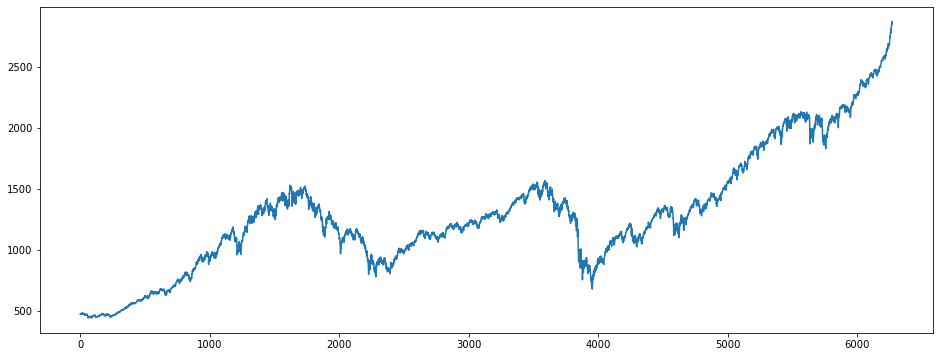

In [6]:
plt.figure(figsize=(16,6))
plt.plot(df.spx)
plt.show()

In [7]:
## QQ Plot for seeing the distribution
import scipy.stats
import pylab

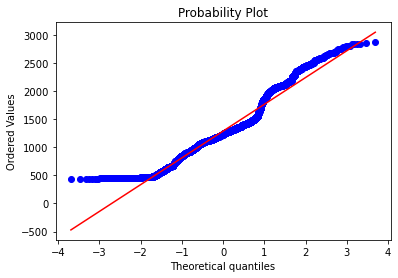

In [8]:
scipy.stats.probplot(df.spx, plot=pylab)
pylab.show()

In [9]:
df.date = pd.to_datetime(df.date, dayfirst=True)

In [10]:
df.head(10)

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26
5,1994-01-14,474.91,2151.05,3400.56,18973.70
6,1994-01-17,473.30,2115.56,3407.83,18725.37
7,1994-01-18,474.25,2130.35,3437.01,18514.55
8,1994-01-19,474.30,2132.52,3475.15,19039.40
9,1994-01-20,474.98,2098.36,3469.99,19183.92


In [11]:
df.date.describe()

C:\Users\HARDIK\AppData\Local\Temp/ipykernel_3192/1371252037.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.date.describe()


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [12]:
df.set_index(df.date, inplace=True)

In [13]:
df.drop('date', axis=1,inplace=True)

In [14]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


  Setting the desired frequency

In [15]:
df = df.asfreq('b')

In [16]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Handling any missing value

In [17]:
df.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [18]:
df.fillna(method='ffill',inplace=True)

In [19]:
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [20]:
df2 = df.copy()

In [21]:
df3 = df.copy()

## Simplifing the dataset

In [22]:
df['Market Value'] = df.spx

In [23]:
df.describe()

,spx,dax,ftse,nikkei,Market Value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.381061,5423.679824,14597.672753,1288.642547
std,487.868210,2755.563853,1145.616719,4043.795272,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4486.730000,10701.130000,992.715221
50%,1233.761241,5774.260000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7445.560000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [24]:
df.drop(['spx','dax','ftse','nikkei'], axis=1,inplace=True)

In [25]:
df.describe()

,Market Value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


## Spliting the data

In [26]:
size = int(len(df)*0.8)

In [27]:
df_train = df.iloc[:size]

In [28]:
df_test = df.iloc[size:]

In [29]:
df_train.tail()

,Market Value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [30]:
df_test.head()

,Market Value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


## White Noise

In [31]:
wn = np.random.normal(loc=df['Market Value'].mean(), scale=df['Market Value'].std(), size = len(df))

In [32]:
df['wn'] = wn

In [33]:
df.describe()

,Market Value,wn
count,6277.000000,6277.000000
mean,1288.642547,1296.868411
std,487.868210,483.781808
min,438.920000,-495.492127
25%,992.715221,977.362170
50%,1233.761241,1288.411317
75%,1460.250000,1625.581535
max,2872.867839,3272.734295


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

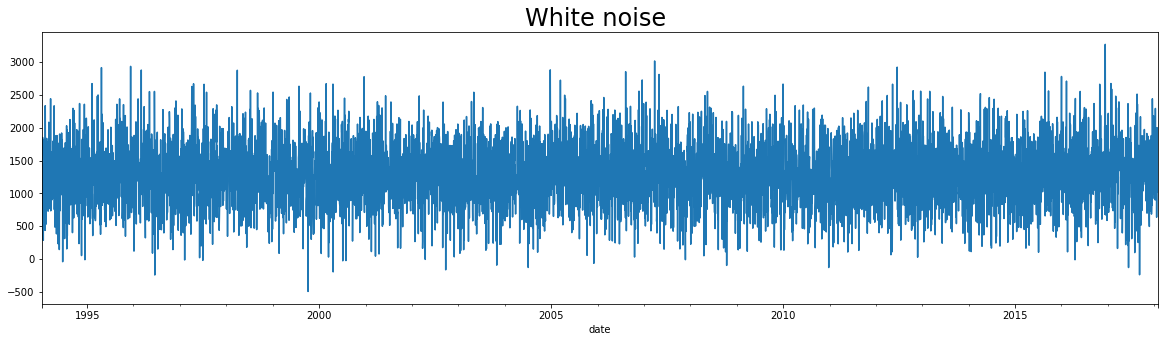

In [34]:
df.wn.plot(figsize=(20,5))
plt.title('White noise ', size=24)
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

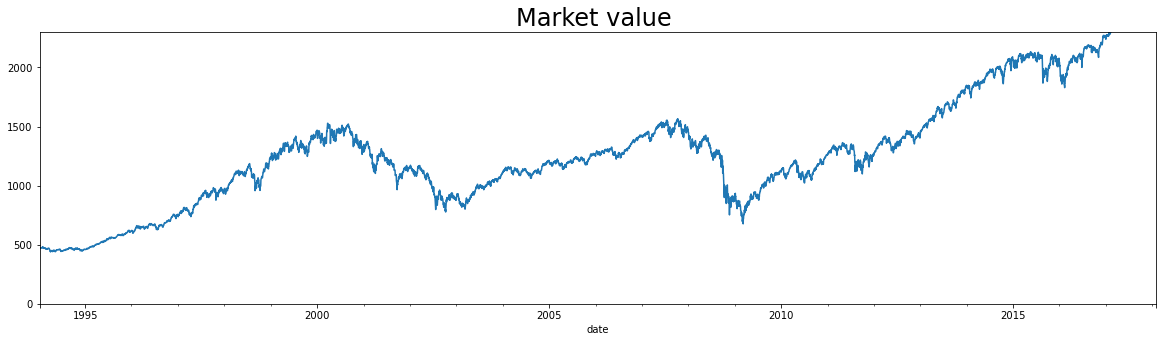

In [35]:
df['Market Value'].plot(figsize=(20,5))
plt.title('Market value ', size=24)
plt.ylim(0,2300)
plt.plot

## Random Walk

In [36]:
rw = pd.read_csv('025 RandWalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)
rw = rw.asfreq('b')

In [37]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [38]:
df['rw'] = rw.price

In [39]:
df.rw.fillna(method='ffill')

date
1994-01-07    1122.139662
1994-01-10    1080.347860
1994-01-11    1082.095245
1994-01-12    1083.639265
1994-01-13    1067.146255
                 ...     
2018-01-23    2152.992143
2018-01-24    2152.992143
2018-01-25    2152.992143
2018-01-26    2152.992143
2018-01-29    2152.992143
Freq: B, Name: rw, Length: 6277, dtype: float64

In [40]:
df.rw.isna().sum()

1256

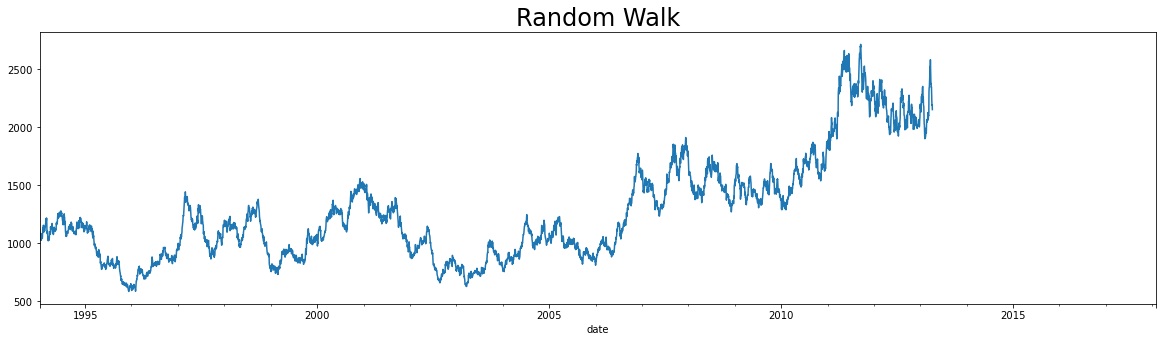

In [41]:
df.rw.plot(figsize=(20,5))
plt.title('Random Walk', size=24)
plt.show()

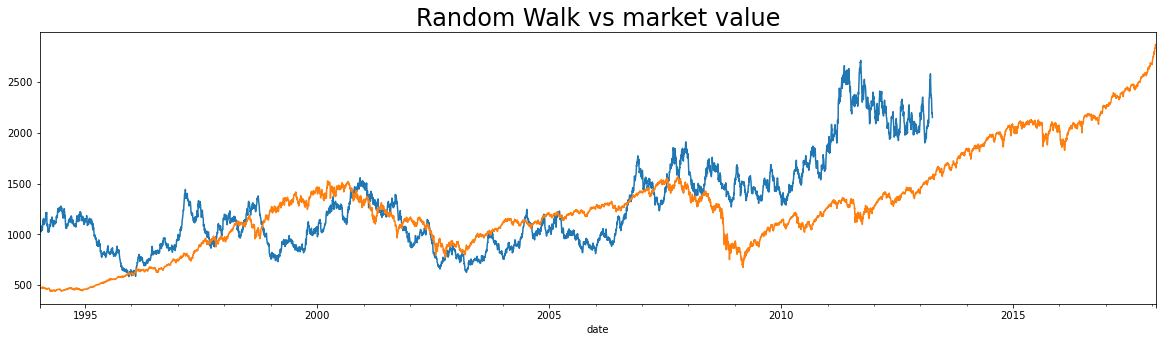

In [42]:
df.rw.plot(figsize=(20,5))
df['Market Value'].plot()
plt.title('Random Walk vs market value', size=24)
plt.show()

## Stationarity

In [43]:
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns 
sns.set()

In [44]:
from statsmodels.tsa.stattools import adfuller

print("Result of dickey fuller test :")
dftest = adfuller(df['Market Value'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statstics', 'p-value', 'Flags Used', 'Number of Observation Used'])
for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key] = value
    
print(dfoutput)

Result of dickey fuller test :
Test Statstics                   1.119499
p-value                          0.995380
Flags Used                      10.000000
Number of Observation Used    6266.000000
Critical Value (1%)             -3.431394
Critical Value (5%)             -2.862001
Critical Value (10%)            -2.567016
dtype: float64


p- value is 0.99 which is very high

In [45]:
from statsmodels.tsa.stattools import adfuller

print("Result of dickey fuller test :")
dftest = adfuller(df.wn, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statstics', 'p-value', 'Flags Used', 'Number of Observation Used'])
for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key] = value
    
print(dfoutput)

Result of dickey fuller test :
Test Statstics                 -78.940284
p-value                          0.000000
Flags Used                       0.000000
Number of Observation Used    6276.000000
Critical Value (1%)             -3.431392
Critical Value (5%)             -2.862001
Critical Value (10%)            -2.567015
dtype: float64


## Seasonality

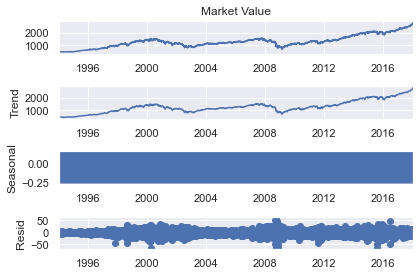

In [46]:
s_dec_add = seasonal_decompose(df['Market Value'], model='additive')
s_dec_add.plot()
plt.show()

no seasonality

## Auto Corelation

In [47]:
import statsmodels.graphics.tsaplots as sgt

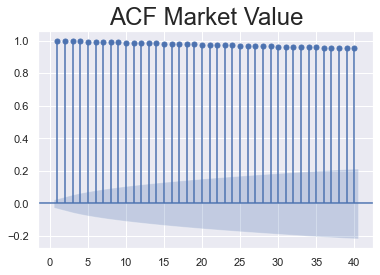

In [48]:
sgt.plot_acf(df['Market Value'], lags=40, zero=False)
plt.title('ACF Market Value',size=24)
plt.show()

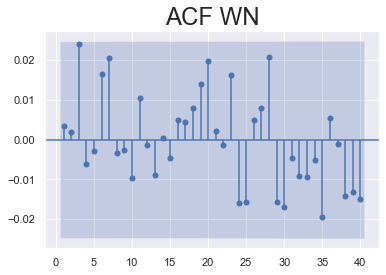

In [49]:
sgt.plot_acf(df['wn'], lags=40, zero=False)
plt.title('ACF WN',size=24)
plt.show()

## PACF

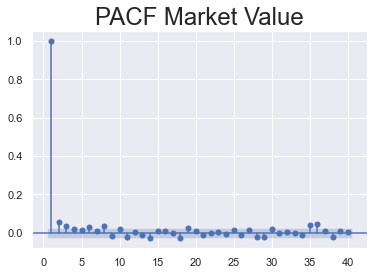

In [50]:
sgt.plot_pacf(df['Market Value'], lags=40, zero=False,method='ols')
plt.title('PACF Market Value',size=24)
plt.show()

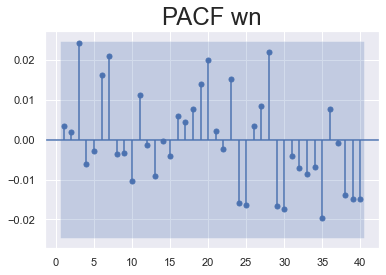

In [51]:
sgt.plot_pacf(df.wn, lags=40, zero=False,method='ols')
plt.title('PACF wn',size=24)
plt.show()

In [52]:
# For ftse
df2['Market_Value'] = df2.ftse

In [53]:
df2.drop(['spx','dax','ftse','nikkei'], axis=1, inplace=True)

In [54]:
df2.head()

,Market_Value
date,
1994-01-07,3445.98
1994-01-10,3440.58
1994-01-11,3413.77
1994-01-12,3372.02
1994-01-13,3360.01


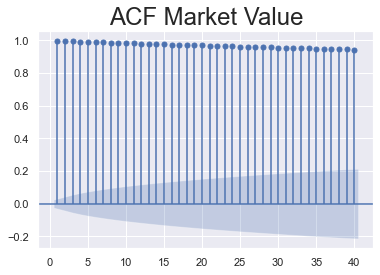

In [55]:
# ACF
sgt.plot_acf(df2.Market_Value, zero=False, lags=40)
plt.title('ACF Market Value',size=24)
plt.show()

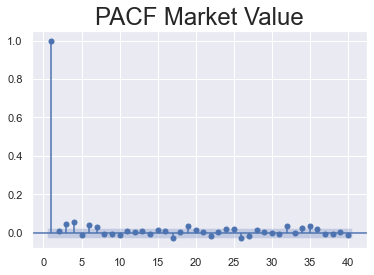

In [56]:
# PACF
sgt.plot_pacf(df2['Market_Value'], lags=40, zero=False,method='ols')
plt.title('PACF Market Value',size=24)
plt.show()

## AR Model

In [57]:
from statsmodels.tsa.arima_model import ARMA
import warnings;
warnings.simplefilter('ignore')
from scipy.stats.distributions import chi2

In [58]:
model_ar = ARMA(df2['Market_Value'], order=(1,0))

In [59]:
result_ar = model_ar.fit()

In [60]:
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_Value   No. Observations:                 6277
Model:                     ARMA(1, 0)   Log Likelihood              -34438.150
Method:                       css-mle   S.D. of innovations             58.379
Date:                Wed, 18 May 2022   AIC                          68882.300
Time:                        09:51:02   BIC                          68902.534
Sample:                    01-07-1994   HQIC                         68889.311
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5874.8933    951.654      6.173      0.000    4009.685    7740.102
ar.L1.Market_Value     0.9991      0.001   1440.022      0.000       0.998       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
-----------------------------------------------------------------------------
"""

In [61]:
# AR(2)
model_ar2 = ARMA(df2['Market_Value'], order=(2,0))

In [62]:
result_ar2 = model_ar2.fit()
result_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_Value   No. Observations:                 6277
Model:                     ARMA(2, 0)   Log Likelihood              -34438.006
Method:                       css-mle   S.D. of innovations             58.377
Date:                Wed, 18 May 2022   AIC                          68884.012
Time:                        09:51:03   BIC                          68910.991
Sample:                    01-07-1994   HQIC                         68893.360
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5989.2256   1225.680      4.886      0.000    3586.938    8391.514
ar.L1.Market_Value     0.9905      0.013     79.049      0.000       0.966       1.015
ar.L2.Market_Value     0.0087      0.013      0.694      0.488      -0.016       0.033
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0008           +0.0000j            1.0008            0.0000
AR.2         -114.8215           +0.0000j          114.8215            0.5000
-----------------------------------------------------------------------------
"""

In [63]:
# AR(3)
model_ar3 = ARMA(df2['Market_Value'], order=(3,0))
result_ar3 = model_ar3.fit()
result_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_Value   No. Observations:                 6277
Model:                     ARMA(3, 0)   Log Likelihood              -34430.861
Method:                       css-mle   S.D. of innovations             58.311
Date:                Wed, 18 May 2022   AIC                          68871.722
Time:                        09:51:04   BIC                          68905.445
Sample:                    01-07-1994   HQIC                         68883.406
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5771.3664    862.368      6.692      0.000    4081.156    7461.577
ar.L1.Market_Value     0.9901      0.013     79.014      0.000       0.966       1.015
ar.L2.Market_Value    -0.0380      0.018     -2.150      0.032      -0.073      -0.003
ar.L3.Market_Value     0.0472      0.013      3.739      0.000       0.022       0.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0008           -0.0000j            1.0008           -0.0000
AR.2           -0.0970           -4.6023j            4.6033           -0.2534
AR.3           -0.0970           +4.6023j            4.6033            0.2534
-----------------------------------------------------------------------------
"""

In [64]:
# AR(4)
model_ar4 = ARMA(df2['Market_Value'], order=(4,0))
result_ar4 = model_ar4.fit()
result_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_Value   No. Observations:                 6277
Model:                     ARMA(4, 0)   Log Likelihood              -34421.635
Method:                       css-mle   S.D. of innovations             58.226
Date:                Wed, 18 May 2022   AIC                          68855.270
Time:                        09:51:06   BIC                          68895.738
Sample:                    01-07-1994   HQIC                         68869.291
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6805    757.479      7.160      0.000    3939.049    6908.312
ar.L1.Market_Value     0.9875      0.013     78.870      0.000       0.963       1.012
ar.L2.Market_Value    -0.0360      0.018     -2.037      0.042      -0.071      -0.001
ar.L3.Market_Value    -0.0062      0.018     -0.353      0.724      -0.041       0.028
ar.L4.Market_Value     0.0539      0.013      4.278      0.000       0.029       0.079
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0007           -0.0000j            1.0007           -0.0000
AR.2            1.0305           -2.2864j            2.5079           -0.1826
AR.3            1.0305           +2.2864j            2.5079            0.1826
AR.4           -2.9459           -0.0000j            2.9459           -0.5000
-----------------------------------------------------------------------------
"""

## LLR Test

In [65]:
def LLR_test(mod1,mod2,DF=1):
    L1 = mod1.fit().llf
    L2 = mod2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p

In [66]:
# Comparison of model with higer lag using log likelyhood test
LLR_test(model_ar2,model_ar3)

0.0

In [67]:
LLR_test(model_ar3,model_ar4)

0.0

## This data Still not stationary so it is difficult for AR model to make correct prediction

## Using Returns

In [68]:
df['Returns'] = df['Market Value'].pct_change().mul(100)
df = df.iloc[1:]

In [69]:
sts.adfuller(df.Returns)

(-14.173447277641333,
 1.9848251568204171e-26,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 19221.15032513027)

 Here p is less 5% than so it is stationary  exactly which is why we turn from prices to return

## ACF and PACF Returns

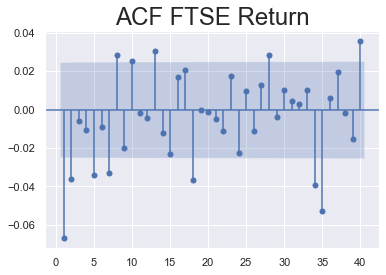

In [70]:
# ACF
sgt.plot_acf(df.Returns, zero=False, lags=40)
plt.title('ACF FTSE Return',size=24)
plt.show()

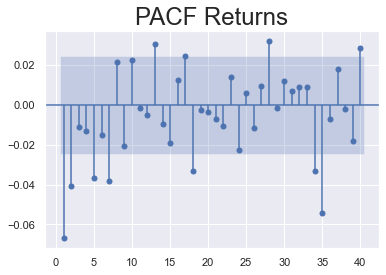

In [71]:
# PACF
sgt.plot_pacf(df.Returns, lags=40, zero=False,method='ols')
plt.title('PACF Returns',size=24)
plt.show()

In [72]:
# AR(1) Returns
model_ret_ar1 = ARMA(df.Returns, order = (1,0))
result_ret_ar1 = model_ret_ar1.fit()

In [73]:
print(result_ret_ar1.summary())

                              ARMA Model Results                              
Dep. Variable:                Returns   No. Observations:                 6276
Model:                     ARMA(1, 0)   Log Likelihood               -9667.195
Method:                       css-mle   S.D. of innovations              1.129
Date:                Wed, 18 May 2022   AIC                          19340.391
Time:                        09:51:13   BIC                          19360.624
Sample:                    01-10-1994   HQIC                         19347.401
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0352      0.013      2.632      0.009       0.009       0.061
ar.L1.Returns    -0.0670      0.013     -5.320      0.000      -0.092      -0.042
                                    Root

In [74]:
model_ret_ar2 = ARMA(df.Returns, order=(2,0))
result_ret_ar2 = model_ret_ar2.fit()
result_ret_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 6276
Model:                     ARMA(2, 0)   Log Likelihood               -9661.970
Method:                       css-mle   S.D. of innovations              1.128
Date:                Wed, 18 May 2022   AIC                          19331.940
Time:                        09:51:14   BIC                          19358.917
Sample:                    01-10-1994   HQIC                         19341.287
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0351      0.013      2.741      0.006       0.010       0.060
ar.L1.Returns    -0.0697      0.013     -5.529      0.000      -0.094      -0.045
ar.L2.Returns    -0.0408      0.013     -3.234      0.001      -0.066      -0.016
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8548           -4.8769j            4.9513           -0.2776
AR.2           -0.8548           +4.8769j            4.9513            0.2776
-----------------------------------------------------------------------------
"""

In [75]:
LLR_test(model_ret_ar1,model_ret_ar2)

0.001

In [76]:
model_ret_ar3 = ARMA(df.Returns, order=(3,0))
result_ret_ar3 = model_ret_ar3.fit()
result_ret_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 6276
Model:                     ARMA(3, 0)   Log Likelihood               -9661.576
Method:                       css-mle   S.D. of innovations              1.128
Date:                Wed, 18 May 2022   AIC                          19333.151
Time:                        09:51:14   BIC                          19366.874
Sample:                    01-10-1994   HQIC                         19344.835
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0351      0.013      2.771      0.006       0.010       0.060
ar.L1.Returns    -0.0702      0.013     -5.561      0.000      -0.095      -0.045
ar.L2.Returns    -0.0416      0.013     -3.288      0.001      -0.066      -0.017
ar.L3.Returns    -0.0112      0.013     -0.888      0.375      -0.036       0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9008           -3.9217j            4.0238           -0.2141
AR.2            0.9008           +3.9217j            4.0238            0.2141
AR.3           -5.5108           -0.0000j            5.5108           -0.5000
-----------------------------------------------------------------------------
"""

In [77]:
LLR_test(model_ret_ar2,model_ret_ar3)

0.375

LLR is high not good , L3retuen p value is also high again not good

## Normalizing Value

In [78]:
benchmark = df['Market Value'].iloc[0]

In [79]:
df['norm'] = df['Market Value'].div(benchmark).mul(100)


In [80]:
sts.adfuller(df.norm)

(1.114325051646524,
 0.9953370456865456,
 10,
 6265,
 {'1%': -3.4313942109103537,
  '5%': -2.8620014488169447,
  '10%': -2.5670156262352637},
 30795.30018838447)

## Normalized Returns

In [81]:
bench_ret = df.Returns.iloc[0]
df['norm_ret'] = df.Returns.div(bench_ret).mul(100)
sts.adfuller(df.norm_ret)

(-14.173447277641248,
 1.984825156821058e-26,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 75036.80983902364)

here we can say that data is stationary as test statistics is -14 which is much less than 1% value

## Moving Average

In [82]:
# MA(1)
model_ret_ma1 = ARMA(df.Returns[1:], order=(0,1))
result_ret_ma1 = model_ret_ma1.fit()
result_ret_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 6275
Model:                     ARMA(0, 1)   Log Likelihood               -9664.492
Method:                       css-mle   S.D. of innovations              1.129
Date:                Wed, 18 May 2022   AIC                          19334.984
Time:                        09:51:16   BIC                          19355.217
Sample:                    01-11-1994   HQIC                         19341.994
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0350      0.013      2.648      0.008       0.009       0.061
ma.L1.Returns    -0.0727      0.013     -5.550      0.000      -0.098      -0.047
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           13.7571           +0.0000j           13.7571            0.0000
-----------------------------------------------------------------------------
"""

In [83]:
# higher lag ma(2)
model_ret_ma2 = ARMA(df.Returns[1:], order=(0,2))
result_ret_ma2 = model_ret_ma2.fit()
result_ret_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 6275
Model:                     ARMA(0, 2)   Log Likelihood               -9659.931
Method:                       css-mle   S.D. of innovations              1.128
Date:                Wed, 18 May 2022   AIC                          19327.862
Time:                        09:51:16   BIC                          19354.839
Sample:                    01-11-1994   HQIC                         19337.209
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0350      0.013      2.759      0.006       0.010       0.060
ma.L1.Returns    -0.0708      0.013     -5.610      0.000      -0.096      -0.046
ma.L2.Returns    -0.0389      0.013     -3.022      0.003      -0.064      -0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            4.2420           +0.0000j            4.2420            0.0000
MA.2           -6.0620           +0.0000j            6.0620            0.5000
-----------------------------------------------------------------------------
"""

In [84]:
LLR_test(model_ret_ma1,model_ret_ma2)

0.003

In [85]:
model_ret_ma3 = ARMA(df.Returns[1:], order=(0,3))
result_ret_ma3 = model_ret_ma3.fit()
result_ret_ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 6275
Model:                     ARMA(0, 3)   Log Likelihood               -9659.547
Method:                       css-mle   S.D. of innovations              1.128
Date:                Wed, 18 May 2022   AIC                          19329.094
Time:                        09:51:17   BIC                          19362.816
Sample:                    01-11-1994   HQIC                         19340.778
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0350      0.013      2.795      0.005       0.010       0.060
ma.L1.Returns    -0.0707      0.013     -5.602      0.000      -0.095      -0.046
ma.L2.Returns    -0.0390      0.013     -3.026      0.002      -0.064      -0.014
ma.L3.Returns    -0.0112      0.013     -0.876      0.381      -0.036       0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            3.2109           -0.0000j            3.2109           -0.0000
MA.2           -3.3454           -4.0750j            5.2723           -0.3594
MA.3           -3.3454           +4.0750j            5.2723            0.3594
-----------------------------------------------------------------------------
"""

In [86]:
LLR_test(model_ret_ma2,model_ret_ma3)

0.381

we will stop at ma2

In [87]:
model_ret_ma4 = ARMA(df.Returns[1:], order=(0,4))
result_ret_ma4 = model_ret_ma4.fit()
result_ret_ma4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 6275
Model:                     ARMA(0, 4)   Log Likelihood               -9658.639
Method:                       css-mle   S.D. of innovations              1.128
Date:                Wed, 18 May 2022   AIC                          19329.278
Time:                        09:51:19   BIC                          19369.744
Sample:                    01-11-1994   HQIC                         19343.299
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0350      0.012      2.851      0.004       0.011       0.059
ma.L1.Returns    -0.0718      0.013     -5.675      0.000      -0.097      -0.047
ma.L2.Returns    -0.0387      0.013     -3.056      0.002      -0.063      -0.014
ma.L3.Returns    -0.0110      0.013     -0.858      0.391      -0.036       0.014
ma.L4.Returns    -0.0166      0.012     -1.348      0.178      -0.041       0.008
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.3264           -0.0000j            2.3264           -0.0000
MA.2           -2.8847           -0.0000j            2.8847           -0.5000
MA.3           -0.0512           -2.9971j            2.9975           -0.2527
MA.4           -0.0512           +2.9971j            2.9975            0.2527
-----------------------------------------------------------------------------
"""

nope ma(2) is the right one

In [88]:
LLR_test(model_ret_ma3,model_ret_ma4)

0.178

In [89]:
model_ret_ma5 = ARMA(df.Returns[1:], order=(0,5))
result_ret_ma5 = model_ret_ma5.fit()
result_ret_ma5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 6275
Model:                     ARMA(0, 5)   Log Likelihood               -9654.281
Method:                       css-mle   S.D. of innovations              1.127
Date:                Wed, 18 May 2022   AIC                          19322.561
Time:                        09:51:22   BIC                          19369.772
Sample:                    01-11-1994   HQIC                         19338.919
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0350      0.012      2.966      0.003       0.012       0.058
ma.L1.Returns    -0.0720      0.013     -5.700      0.000      -0.097      -0.047
ma.L2.Returns    -0.0404      0.013     -3.188      0.001      -0.065      -0.016
ma.L3.Returns    -0.0072      0.013     -0.562      0.574      -0.032       0.018
ma.L4.Returns    -0.0149      0.012     -1.219      0.223      -0.039       0.009
ma.L5.Returns    -0.0365      0.012     -2.953      0.003      -0.061      -0.012
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.7377           -0.0000j            1.7377           -0.0000
MA.2            0.5998           -1.8655j            1.9596           -0.2005
MA.3            0.5998           +1.8655j            1.9596            0.2005
MA.4           -1.6730           -1.1411j            2.0251           -0.4047
MA.5           -1.6730           +1.1411j            2.0251            0.4047
-----------------------------------------------------------------------------
"""

In [90]:
LLR_test(model_ret_ma4,model_ret_ma5)

0.003

as we can see in acf return plot the 5th one is again better
and LLR test shows the more complex model are better

In [91]:
LLR_test(model_ret_ar3,model_ret_ma5,DF = 2)

0.001

so it proves 5 is better

## ARMA Model

In [92]:
model_arma = ARMA(df.Returns[1:], order=(1,1))
result_arma = model_arma.fit()
result_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 6275
Model:                     ARMA(1, 1)   Log Likelihood               -9656.802
Method:                       css-mle   S.D. of innovations              1.127
Date:                Wed, 18 May 2022   AIC                          19321.604
Time:                        09:51:28   BIC                          19348.582
Sample:                    01-11-1994   HQIC                         19330.952
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0350      0.012      3.005      0.003       0.012       0.058
ar.L1.Returns     0.6371      0.086      7.449      0.000       0.469       0.805
ma.L1.Returns    -0.7032      0.079     -8.907      0.000      -0.858      -0.548
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5696           +0.0000j            1.5696            0.0000
MA.1            1.4221           +0.0000j            1.4221            0.0000
-----------------------------------------------------------------------------
"""

## Higher Lag ARMA

In [93]:
model_arma3 = ARMA(df.Returns[1:], order=(4,3))
result_arma3 = model_arma3.fit()
result_arma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 6275
Model:                     ARMA(4, 3)   Log Likelihood               -9647.621
Method:                       css-mle   S.D. of innovations              1.126
Date:                Wed, 18 May 2022   AIC                          19313.243
Time:                        09:51:46   BIC                          19373.942
Sample:                    01-11-1994   HQIC                         19334.274
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0350      0.012      3.028      0.002       0.012       0.058
ar.L1.Returns    -0.3855      0.093     -4.166      0.000      -0.567      -0.204
ar.L2.Returns    -0.2397      0.109     -2.209      0.027      -0.452      -0.027
ar.L3.Returns     0.6720      0.103      6.543      0.000       0.471       0.873
ar.L4.Returns     0.0154      0.018      0.867      0.386      -0.019       0.050
ma.L1.Returns     0.3155      0.092      3.447      0.001       0.136       0.495
ma.L2.Returns     0.1842      0.096      1.909      0.056      -0.005       0.373
ma.L3.Returns    -0.7378      0.090     -8.188      0.000      -0.914      -0.561
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5460           -0.8554j            1.0148           -0.3404
AR.2           -0.5460           +0.8554j            1.0148            0.3404
AR.3            1.4338           -0.0000j            1.4338           -0.0000
AR.4          -44.0950           -0.0000j           44.0950           -0.5000
MA.1           -0.5417           -0.8504j            1.0083           -0.3403
MA.2           -0.5417           +0.8504j            1.0083            0.3403
MA.3            1.3331           -0.0000j            1.3331           -0.0000
-----------------------------------------------------------------------------
"""

In [94]:
LLR_test(model_arma,model_arma3)

0.0

In [95]:
model_arma32 = ARMA(df.Returns[1:], order=(3,2))
result_arma32 = model_arma32.fit()
result_arma32.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 6275
Model:                     ARMA(3, 2)   Log Likelihood               -9655.814
Method:                       css-mle   S.D. of innovations              1.127
Date:                Wed, 18 May 2022   AIC                          19325.629
Time:                        09:52:13   BIC                          19372.839
Sample:                    01-11-1994   HQIC                         19341.986
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0350      0.012      3.028      0.002       0.012       0.058
ar.L1.Returns    -0.2070      0.125     -1.650      0.099      -0.453       0.039
ar.L2.Returns     0.6103      0.114      5.342      0.000       0.386       0.834
ar.L3.Returns     0.0053      0.017      0.307      0.759      -0.029       0.039
ma.L1.Returns     0.1356      0.125      1.087      0.277      -0.109       0.380
ma.L2.Returns    -0.6557      0.110     -5.972      0.000      -0.871      -0.440
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1265           +0.0000j            1.1265            0.5000
AR.2            1.4505           +0.0000j            1.4505            0.0000
AR.3         -115.6232           +0.0000j          115.6232            0.5000
MA.1           -1.1359           +0.0000j            1.1359            0.5000
MA.2            1.3427           +0.0000j            1.3427            0.0000
-----------------------------------------------------------------------------
"""

ARMA 1,1  still better

# ARIMA Model

In [96]:
    from statsmodels.tsa.arima_model import ARIMA

In [97]:
df2['returns'] = df2.Market_Value.pct_change(1)*100

In [98]:
df2

,Market_Value,returns
date,,
1994-01-07,3445.980000,NaN
1994-01-10,3440.580000,-0.156704
1994-01-11,3413.770000,-0.779229
1994-01-12,3372.020000,-1.222988
1994-01-13,3360.010000,-0.356166
...,...,...
2018-01-23,7731.827774,0.212382
2018-01-24,7643.428966,-1.143311
2018-01-25,7615.839954,-0.360951


In [99]:
# ARIMA (1,1,1)
model_arima111 = ARIMA(df2.Market_Value, order=(1,1,1))
result_arima111 = model_arima111.fit()
result_arima111.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.Market_Value   No. Observations:                 6276
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34417.643
Method:                       css-mle   S.D. of innovations             58.269
Date:                Wed, 18 May 2022   AIC                          68843.285
Time:                        09:52:17   BIC                          68870.263
Sample:                    01-10-1994   HQIC                         68852.633
                         - 01-29-2018                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6749      0.581      1.162      0.245      -0.464       1.813
ar.L1.D.Market_Value     0.8356      0.078     10.778      0.000       0.684       0.987
ma.L1.D.Market_Value    -0.8702      0.070    -12.465      0.000      -1.007      -0.733
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1968           +0.0000j            1.1968            0.0000
MA.1            1.1492           +0.0000j            1.1492            0.0000
-----------------------------------------------------------------------------
"""

# Residual of ARIMA (1,1,1)

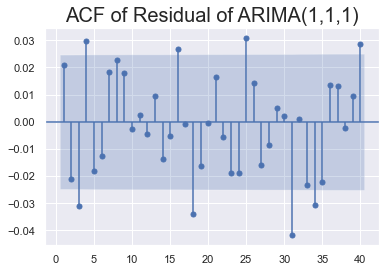

In [100]:
df2['res_arima111'] = result_arima111.resid
sgt.plot_acf(df2.res_arima111[1:], zero=False, lags=40)
plt.title("ACF of Residual of ARIMA(1,1,1)", size=20)
plt.show()

## Higher Lag ARIMA model

In [101]:
model_arima112 = ARIMA(df2.Market_Value, order=(1,1,2))
result_arima112 = model_arima112.fit()
model_arima113 = ARIMA(df2.Market_Value, order=(1,1,3))
result_arima113 = model_arima113.fit()
model_arima211 = ARIMA(df2.Market_Value, order=(2,1,1))
result_arima211 = model_arima211.fit()
model_arima312 = ARIMA(df2.Market_Value, order=(3,1,2))
result_arima312 = model_arima312.fit(start_ar_lags=5)
model_arima311 = ARIMA(df2.Market_Value, order=(3,1,1))
result_arima311 = model_arima311.fit()

In [102]:
print("AIRIMA(1,1,2) \t LL =", result_arima112.llf, "\t AIC=" , result_arima112.aic)
print("AIRIMA(1,1,3) \t LL =", result_arima113.llf, "\t AIC=" , result_arima113.aic)
print("AIRIMA(2,1,1) \t LL =", result_arima211.llf, "\t AIC=" , result_arima211.aic)
print("AIRIMA(3,1,2) \t LL =", result_arima312.llf, "\t AIC=" , result_arima312.aic)
print("AIRIMA(3,1,1) \t LL =", result_arima311.llf, "\t AIC=" , result_arima311.aic)

AIRIMA(1,1,2) 	 LL = -34413.66331716288 	 AIC= 68837.32663432576
AIRIMA(1,1,3) 	 LL = -34410.78126375665 	 AIC= 68833.5625275133
AIRIMA(2,1,1) 	 LL = -34413.51837499095 	 AIC= 68837.0367499819
AIRIMA(3,1,2) 	 LL = -34410.795902256265 	 AIC= 68835.59180451253
AIRIMA(3,1,1) 	 LL = -34412.28349753043 	 AIC= 68836.56699506086


113 is the best

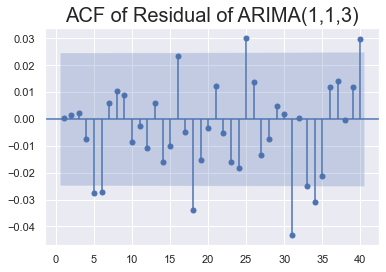

In [103]:
#ACF of residual
df2['res_arima113'] = result_arima113.resid.iloc[:]
sgt.plot_acf(df2.res_arima113[1:], zero=False, lags=40)
plt.title("ACF of Residual of ARIMA(1,1,3)", size=20)
plt.show()

In [104]:
model_arima511 = ARIMA(df2.Market_Value, order=(5,1,1))
result_arima511 = model_arima511.fit()
model_arima613 = ARIMA(df2.Market_Value, order=(6,1,3))
result_arima613 = model_arima613.fit()

In [105]:
print("AIRIMA(5,1,1) \t LL =", result_arima511.llf, "\t AIC=" , result_arima511.aic)
print("AIRIMA(1,1,3) \t LL =", result_arima113.llf, "\t AIC=" , result_arima113.aic)
print("AIRIMA(6,1,3) \t LL =", result_arima613.llf, "\t AIC=" , result_arima613.aic)

AIRIMA(5,1,1) 	 LL = -34406.532116202354 	 AIC= 68829.06423240471
AIRIMA(1,1,3) 	 LL = -34410.78126375665 	 AIC= 68833.5625275133
AIRIMA(6,1,3) 	 LL = -34404.764882702366 	 AIC= 68831.52976540473


ARIMA (6,1,3) is best

In [106]:
LLR_test(model_arima113, model_arima613, DF=5)

0.034

p is high so we will go for 5,1,1 rather than 6,1,3 

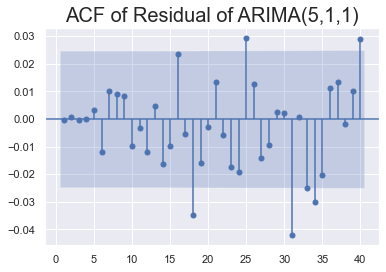

In [107]:
#ACF of residual
df2['res_arima511'] = result_arima511.resid.iloc[:]
sgt.plot_acf(df2.res_arima511[1:], zero=False, lags=40)
plt.title("ACF of Residual of ARIMA(5,1,1)", size=20)
plt.show()

# ARIMAX

In [108]:
model_arima111xspx = ARIMA(df2.Market_Value,exog=df3.spx, order=(1,1,1))     # Exogeneous = spx
result_arima111xspx = model_arima111xspx.fit()
result_arima111xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.Market_Value   No. Observations:                 6276
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34417.384
Method:                       css-mle   S.D. of innovations             58.267
Date:                Wed, 18 May 2022   AIC                          68844.768
Time:                        09:53:04   BIC                          68878.490
Sample:                    01-10-1994   HQIC                         68856.452
                         - 01-29-2018                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4076      1.653     -0.247      0.805      -3.647       2.831
spx                      0.0008      0.001      0.702      0.483      -0.002       0.003
ar.L1.D.Market_Value     0.8336      0.078     10.737      0.000       0.681       0.986
ma.L1.D.Market_Value    -0.8683      0.070    -12.401      0.000      -1.006      -0.731
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1996           +0.0000j            1.1996            0.0000
MA.1            1.1517           +0.0000j            1.1517            0.0000
-----------------------------------------------------------------------------
"""

# SARIMAX

In [109]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [110]:
model_sarimax= SARIMAX(df2.Market_Value,exog=df3.spx, order=(1,0,1), seasonal_order=(2,0,1,5))     # Exogeneous = spx
result_sarimax = model_sarimax.fit()
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      Market_Value   No. Observations:                 6277
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -33291.742
Date:                           Wed, 18 May 2022   AIC                          66597.483
Time:                                   09:53:30   BIC                          66644.696
Sample:                               01-07-1994   HQIC                         66613.842
                                    - 01-29-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.5333      0.031     81.808      0.000       2.473       2.594
ar.L1          0.9999      0.001    755.779      0.000       0.997       1.003
ma.L1         -0.2653      0.004    -62.165      0.000      -0.274      -0.257
ar.S.L5        0.9750      0.006    157.063      0.000       0.963       0.987
ar.S.L10       0.0250      0.007      3.704      0.000       0.012       0.038
ma.S.L5       -0.9998      0.010   -101.017      0.000      -1.019      -0.980
sigma2      2421.3905     28.643     84.536      0.000    2365.250    2477.531
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):              4578.90
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# ARCH Model

### Creating the Squared Returns

In [111]:
df['sq_returns'] = df.Returns.mul(df.Returns)

### Returned vs Squared Return 

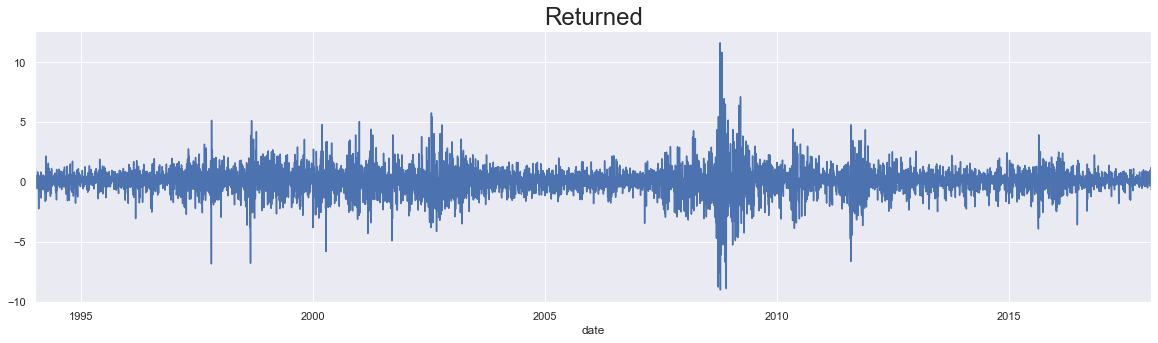

In [112]:
df.Returns.plot(figsize=(20,5))
plt.title("Returned", size =24)
plt.show()

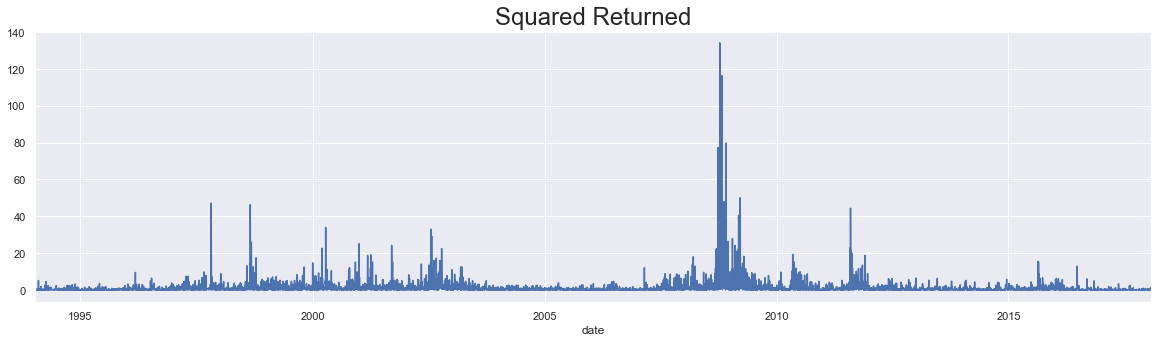

In [113]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Squared Returned", size =24)
plt.show()

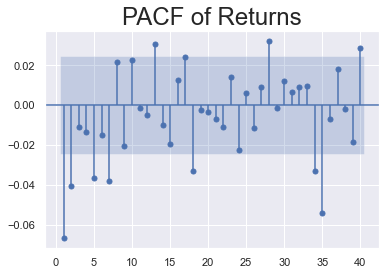

In [114]:
sgt.plot_pacf(df.Returns[1:], lags=40, alpha=0.05, zero=False, method='ols')
plt.title('PACF of Returns', size = 24)
plt.show()

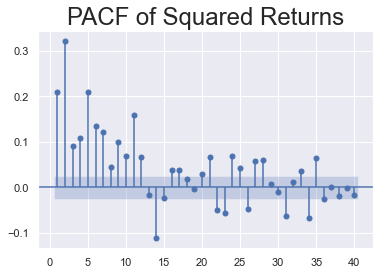

In [115]:
sgt.plot_pacf(df.sq_returns[1:], lags=40, alpha=0.05, zero=False, method='ols')
plt.title('PACF of Squared Returns', size = 24)
plt.show()

In [116]:
from arch import arch_model

In [117]:
model_arch1 = arch_model(df.Returns[1:])
result_arch1 = model_arch1.fit()
result_arch1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 326208058097.60095
Iteration:      2,   Func. Count:     15,   Neg. LLF: 3485196422.4215307
Iteration:      3,   Func. Count:     23,   Neg. LLF: 8391.897078913404
Iteration:      4,   Func. Count:     29,   Neg. LLF: 8365.285512119255
Iteration:      5,   Func. Count:     35,   Neg. LLF: 8469.479757190129
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8303.438110482846
Iteration:      7,   Func. Count:     47,   Neg. LLF: 9001.844075109668
Iteration:      8,   Func. Count:     54,   Neg. LLF: 8314.711890503635
Iteration:      9,   Func. Count:     60,   Neg. LLF: 8294.298432125323
Iteration:     10,   Func. Count:     65,   Neg. LLF: 8294.296863076606
Iteration:     11,   Func. Count:     70,   Neg. LLF: 8294.296851350988
Iteration:     12,   Func. Count:     74,   Neg. LLF: 8294.296851352941
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8294.296851350988
            Iterations: 12

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8294.30
Distribution:                  Normal   AIC:                           16596.6
Method:            Maximum Likelihood   BIC:                           16623.6
                                        No. Observations:                 6275
Date:                Wed, May 18 2022   Df Residuals:                     6274
Time:                        09:53:35   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0623  9.822e-03      6.348  2.185e-10 [4.310e-02,8.160e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0120  3.333e-03      3.611  3.048e-04 [5.503e-03,1.857e-02]
alpha[1]       0.0850  1.187e-02      7.164  7.838e-13   [6.175e-02,  0.108]
beta[1]        0.9053  1.274e-02     71.057      0.000     [  0.880,  0.930]
============================================================================

Covariance estimator: robust
"""

In [118]:
model_arch1 = arch_model(df.Returns[1:], mean='Constant' , vol='ARCH', p=1)
result_arch1 = model_arch1.fit()
result_arch1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 38989.77166971617
Iteration:      2,   Func. Count:     13,   Neg. LLF: 14512.88291745145
Iteration:      3,   Func. Count:     20,   Neg. LLF: 9578.985158461723
Iteration:      4,   Func. Count:     26,   Neg. LLF: 9352.062062760626
Iteration:      5,   Func. Count:     30,   Neg. LLF: 9352.062059348398
Iteration:      6,   Func. Count:     33,   Neg. LLF: 9352.062059348402
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9352.062059348398
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -9352.06
Distribution:                  Normal   AIC:                           18710.1
Method:            Maximum Likelihood   BIC:                           18730.4
                                        No. Observations:                 6275
Date:                Wed, May 18 2022   Df Residuals:                     6274
Time:                        09:53:35   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0529  1.521e-02      3.476  5.095e-04 [2.306e-02,8.270e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9068  4.512e-02     20.098  7.660e-90 [  0.818,  0.995]
alpha[1]       0.3121  4.936e-02      6.323  2.561e-10 [  0.215,  0.409]
========================================================================

Covariance estimator: robust
"""

## Higher ARCH Model

In [119]:
model_arch2 = arch_model(df.Returns[1:], mean='Constant' , vol='ARCH', p=2)
result_arch2 = model_arch2.fit()
result_arch2.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 199987.3184344597
Iteration:      2,   Func. Count:     15,   Neg. LLF: 11944816.204569448
Iteration:      3,   Func. Count:     21,   Neg. LLF: 9503.894004713831
Iteration:      4,   Func. Count:     28,   Neg. LLF: 9919.271363642578
Iteration:      5,   Func. Count:     34,   Neg. LLF: 9251.979388737887
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8961.249412769468
Iteration:      7,   Func. Count:     47,   Neg. LLF: 8958.138320055004
Iteration:      8,   Func. Count:     52,   Neg. LLF: 8958.138318926776
Iteration:      9,   Func. Count:     56,   Neg. LLF: 8958.138318926784
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8958.138318926776
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8958.14
Distribution:                  Normal   AIC:                           17924.3
Method:            Maximum Likelihood   BIC:                           17951.3
                                        No. Observations:                 6275
Date:                Wed, May 18 2022   Df Residuals:                     6274
Time:                        09:53:35   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0652  1.303e-02      4.999  5.754e-07 [3.961e-02,9.069e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6190  3.389e-02     18.266  1.531e-74 [  0.553,  0.685]
alpha[1]       0.1982  3.071e-02      6.453  1.095e-10 [  0.138,  0.258]
alpha[2]       0.3287  3.915e-02      8.396  4.601e-17 [  0.252,  0.405]
========================================================================

Covariance estimator: robust
"""

ARCH(2) is better it will continue till ARCH(12)

# GARCH Model

In [1]:
model_garch11 = arch_model(df.Returns[1:], mean='Constant' , vol='GARCH', p=1, q=1)
result_garch11 = model_garch11.fit(update_freq=5)
result_garch11.summary()

NameError: name 'arch_model' is not defined

Higher order garch are observed to be not performing well hence a garch(1,1) is optimal choice

# Auto ARIMA

In [131]:
from pmdarima.arima import auto_arima

In [132]:
model_auto = auto_arima(df2.returns[1:])

In [133]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6276
Model:               SARIMAX(4, 0, 5)   Log Likelihood               -9553.791
Date:                Wed, 18 May 2022   AIC                          19129.582
Time:                        10:18:51   BIC                          19203.771
Sample:                             0   HQIC                         19155.287
                               - 6276                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0241      0.017      1.419      0.156      -0.009       0.057
ar.L1          0.0853      0.077      1.104      0.270      -0.066       0.237
ar.L2         -0.5635      0.078     -7.225      0.000      -0.716      -0.411
ar.L3         -0.1206      0.071     -1.702      0.089      -0.260       0.018
ar.L4          0.3062      0.074      4.130      0.000       0.161       0.452
ma.L1         -0.1045      0.077     -1.351      0.177      -0.256       0.047
ma.L2          0.5174      0.079      6.512      0.000       0.362       0.673
ma.L3          0.0427      0.070      0.613      0.540      -0.094       0.179
ma.L4         -0.3058      0.074     -4.134      0.000      -0.451      -0.161
ma.L5         -0.0873      0.008    -10.308      0.000      -0.104      -0.071
sigma2         1.2272      0.012    104.093      0.000       1.204       1.250
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              8750.12
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [135]:
df3.spx_ret = df3.spx.pct_change(1)*100

In [147]:
df3['spx_ret']=df3.spx_ret

In [154]:
model_auto = auto_arima(df2[['returns']][1:], exogenous= df3[['spx_ret']][1:],m=5,max_order=None,max_p=7,max_q=7,max_d=2,
                       max_P=4, max_D=2,max_Q=4, maxiter=50, 
                       alpha=0.05, n_jobs=-1,trend="ct", information_criterion='oob',
                       out_of_sample_size=int(len(df2)*0.2))

In [155]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 6276
Model:             SARIMAX(3, 0, 1)x(2, 0, [], 5)   Log Likelihood               -8481.386
Date:                            Wed, 18 May 2022   AIC                          16982.773
Time:                                    11:13:17   BIC                          17050.218
Sample:                                         0   HQIC                         17006.141
                                           - 6276                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.025      0.048      0.962      -0.047       0.049
drift       1.406e-07   7.22e-06      0.019      0.984    -1.4e-05    1.43e-05
x1             0.4888      0.007     72.175      0.000       0.475       0.502
ar.L1         -0.1142      0.072     -1.581      0.114      -0.256       0.027
ar.L2         -0.0596      0.018     -3.223      0.001      -0.096      -0.023
ar.L3         -0.1013      0.010     -9.962      0.000      -0.121      -0.081
ma.L1         -0.1352      0.072     -1.888      0.059      -0.276       0.005
ar.S.L5       -0.0456      0.010     -4.689      0.000      -0.065      -0.027
ar.S.L10      -0.0058      0.009     -0.613      0.540      -0.024       0.013
sigma2         0.9609      0.010     92.942      0.000       0.941       0.981
===================================================================================
Ljung-Box (L1) (Q):                   1.19   Jarque-Bera (JB):              8776.69
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""